# Visualizing data
Data science from Scratch
### matplotlib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
from pandas import Series, DataFrame
import pandas as pd

pd.set_option('display.mpl_style', 'default')

In [ ]:
years = [1950, 1960, 1970, 1980, 1990, 2000]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7]

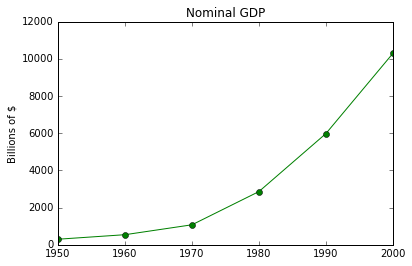

In [2]:
plt.plot(years, gdp, color='green',  marker='o', linestyle='solid' )
plt.title('Nominal GDP')
plt.ylabel('Billions of $')
plt.show()

### Bar Charts

In [3]:
movies = ['Annie Hall', 'Ben-Hur', 'Casablanca', 'Gandhi']
num_oscars = [5, 11, 3, 8]
xs = [i + 0.1 for i,_ in enumerate(movies)]

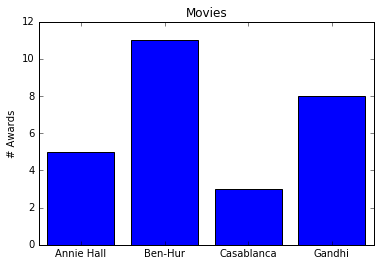

In [4]:
plt.bar(xs, num_oscars)
plt.xticks([i + 0.5 for i,_ in enumerate(movies)], movies)
plt.ylabel('# Awards')
plt.title('Movies')
plt.show()

### Histogram

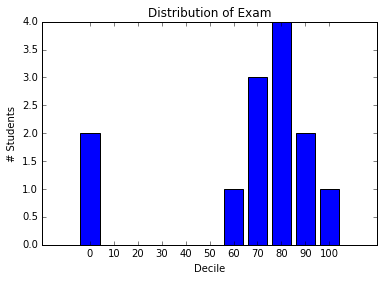

In [5]:
from collections import Counter

grades  = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10*10                   #range of 10

histogram = Counter(decile(grade) for grade in grades)
plt.bar([x - 4 for x in histogram.keys()], histogram.values(), width = 8)   #width of the bar

plt.xticks([10*i for i in range(11)])
plt.xlabel('Decile')
plt.ylabel('# Students')
plt.title('Distribution of Exam')
plt.show()

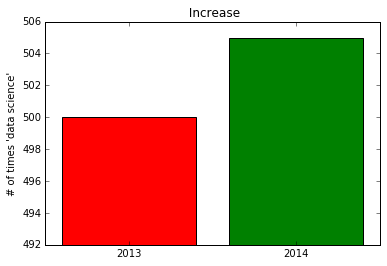

In [6]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, width = 0.8, color =['red','green'])
plt.xticks(years)
plt.ylabel("# of times 'data science'")

plt.ticklabel_format(useOffset = False)                   # off in the corner
plt.axis([2012.5,2014.5, 492, 506])                       #limits on axis

plt.title(' Increase')
plt.show()

### Line Charts

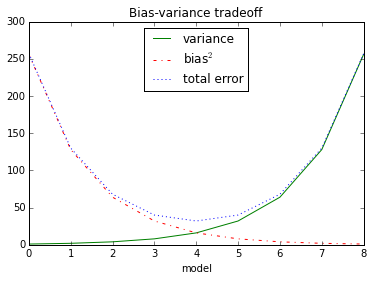

In [39]:
variance = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]
total_error = [x+y for x,y in zip(variance, bias_squared)]
xs = [i for i,_ in enumerate(variance)]

plt.plot(xs, variance,     'g-' , label = 'variance')           #select line style
plt.plot(xs, bias_squared, 'r-.', label = 'bias$^2$')           #accepts Latex syntaxis
plt.plot(xs, total_error,  'b:' , label = 'total error')

plt.legend(loc = 'upper center')                                #legend location
plt.xlabel('model')
plt.title('Bias-variance tradeoff')
plt.show()

### Scatterplots

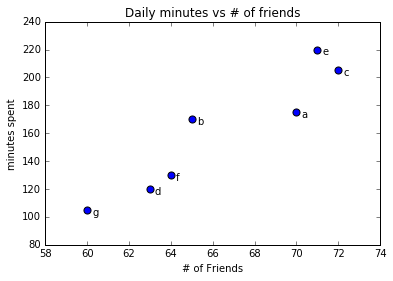

In [7]:
friends = [70, 65, 72, 63, 71, 64, 60]
minutes = [175, 170, 205, 120, 220, 130, 105]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

plt.scatter(friends, minutes, s =50)                            #size of the marker

for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,                                         #add text to the plot
                xy = (friend_count, minute_count),              #label position
                xytext = (5, -5),                               #but slightly offset    
                textcoords = 'offset points')
    
plt.title('Daily minutes vs # of friends')
plt.xlabel('# of Friends')
plt.ylabel('minutes spent')
plt.show()

## Figures and Subplots
Python for Data Analysis 

In [53]:
#import pandas as pd

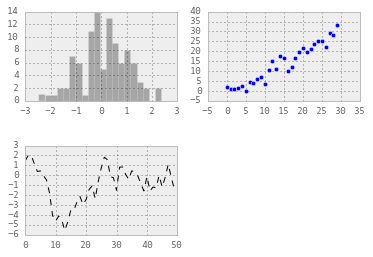

In [55]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(np.arange(30), np.arange(30)+ 3*randn(30))
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(randn(50).cumsum(), 'k--')
_ =ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

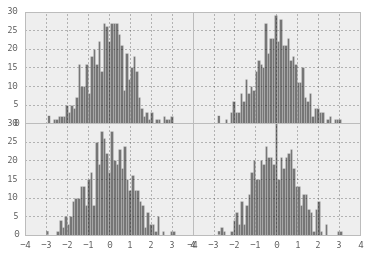

In [56]:
fig, axes =plt.subplots(2, 2, sharex = True, sharey= True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)


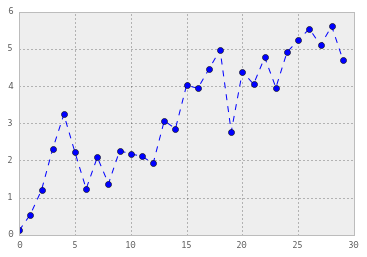

In [60]:
plt.plot(randn(30).cumsum(), color='b', linestyle='dashed', marker='o')

### drawstyle

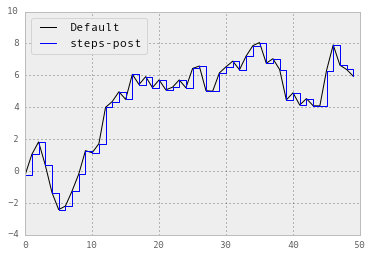

In [70]:
data = randn(50).cumsum()
plt.plot(data, label='Default', color='k')
plt.plot(data,  drawstyle= 'steps-post', label='steps-post', color='b')
plt.legend(loc= 'best')

## Ticks, Labels, and Legends

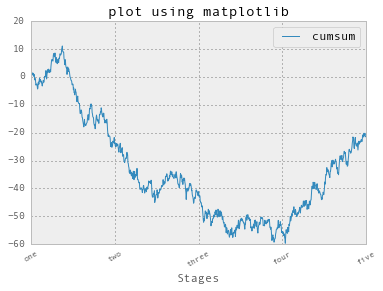

In [76]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), label='cumsum')
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
ax.set_title('plot using matplotlib')
ax.set_xlabel('Stages')
ax.legend(loc='best')       #or plt.legend

## Annotations and Drawing

In [77]:
from datetime import datetime

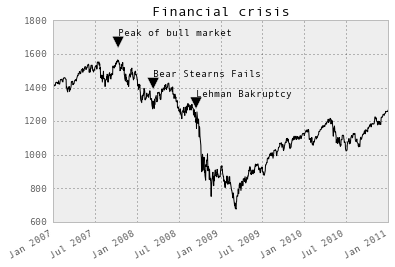

In [84]:
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)
spx  = data['SPX']
spx.plot(ax = ax, style='k-')

crisis_data = [
                (datetime(2007, 10, 11), 'Peak of bull market'),
                (datetime(2008, 3,  12), 'Bear Stearns Fails'), 
                (datetime(2008, 9,  15), 'Lehman Bakruptcy')]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+80),
                   xytext= (date, spx.asof(date)+200),
                   arrowprops = dict(facecolor='black'),
                   horizontalalignment = 'left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Financial crisis')

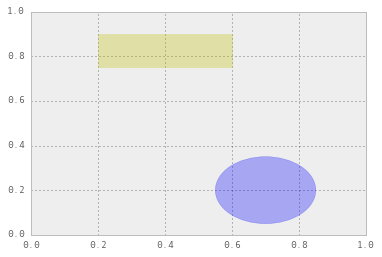

In [87]:
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, .75), 0.4, 0.15, color='y', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)

ax.add_patch(rect)
ax.add_patch(circ)

#dpi = dots per inch
#bbox_inches = trim the whitespace
#plt.savefig('name.pdf', dpi=400, bbox_inches='tight')   

## matplotlib Configuration

    font_options = {'family' : 'monospace',
                    'size'   : 'small'}
    plt.rc('font', **font_options)

# Plotting functions in pandas

## Line plots

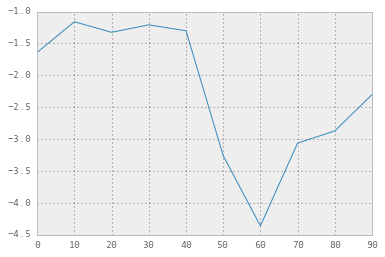

In [11]:
s = Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s.plot()

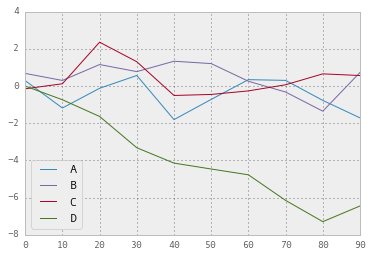

In [18]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns =['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot(grid=True)

## Bar plots

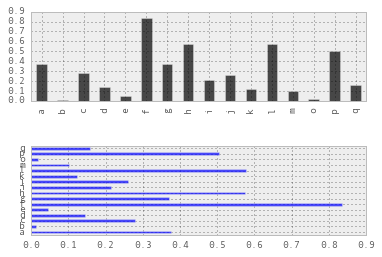

In [28]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmopq'))
data.plot(kind='bar', ax=axes[0], color ='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color= 'b', alpha=0.7)

In [29]:
df = DataFrame(np.random.rand(6, 4), 
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns= pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.695490,0.879671,0.931194,0.998499
two,0.225993,0.456054,0.692561,0.434159
three,0.023160,0.176874,0.616223,0.108198
four,0.940673,0.934205,0.739118,0.743246
five,0.046719,0.881497,0.763112,0.825298
six,0.547841,0.278314,0.424440,0.110871


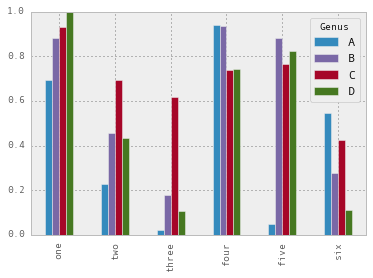

In [31]:
df.plot(kind='bar')

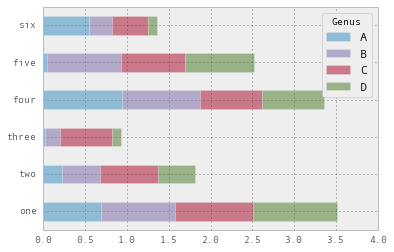

In [33]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [42]:
tips = pd.read_csv('data/tips.csv')

In [47]:
party_counts = pd.crosstab(tips.day, tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [48]:
# normalize

party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)


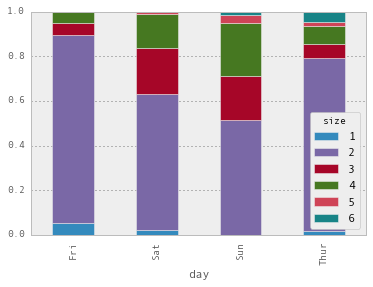

In [49]:
party_pcts.plot(kind= 'bar', stacked=True)

## Histograms and Density plots

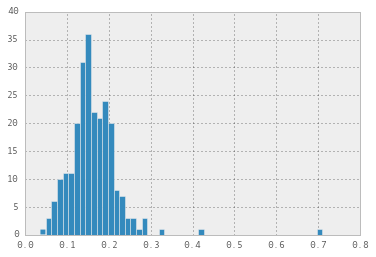

In [50]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips['tip_pct'].hist(bins=50)

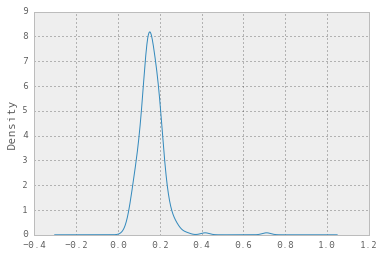

In [52]:
#kde kernel density estimate

tips['tip_pct'].plot(kind='kde')

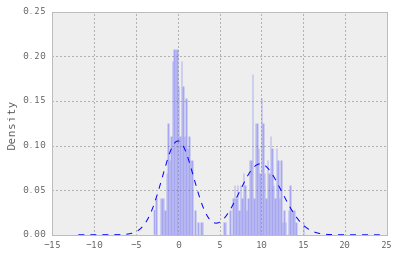

In [54]:
comp1 = np.random.normal(0, 1, size=200)   #N(0,1)
comp2 = np.random.normal(10,2, size=200)   #N(10,4)

values = Series(np.concatenate([comp1, comp2]))

values.hist(bins = 100, alpha=0.3, color='b', normed=True)
values.plot(kind='kde', style='b--')

## Scatter Plots

In [60]:
macro = pd.read_csv('data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


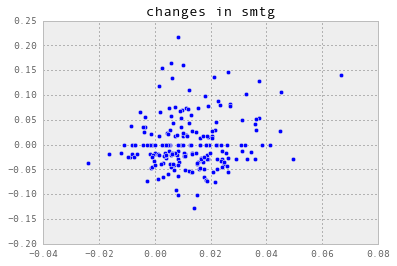

In [61]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('changes in smtg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cf37d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e5cd490>]], dtype=object)

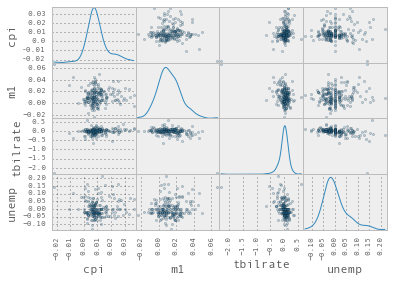

In [63]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)